# Boston housing dataset 🏠

---

## 1. Introduction

### Project Overview
In this project, we aim to build a robust **Machine Learning model** to predict housing prices in Boston based on various socio-economic features.
The dataset contains **506 samples** with **14 features** such as crime rate, number of rooms, and property tax rates.


### Explain the feature
Variables There are 14 attributes in each case of the dataset. They are:
| #  | Feature | Description |
|----|---------|-------------|
| 1  | **CRIM**    | Per capita crime rate by town |
| 2  | **ZN**      | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| 3  | **INDUS**   | Proportion of non-retail business acres per town |
| 4  | **CHAS**    | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| 5  | **NOX**     | Nitric oxides concentration (parts per 10 million) |
| 6  | **RM**      | Average number of rooms per dwelling |
| 7  | **AGE**     | Proportion of owner-occupied units built prior to 1940 |
| 8  | **DIS**     | Weighted distances to five Boston employment centres |
| 9  | **RAD**     | Index of accessibility to radial highways |
| 10 | **TAX**     | Full value property tax rate per $10,000 |
| 11 | **PTRATIO** | Pupil-teacher ratio by town |
| 12 |   **B**     | 1000(Bk — 0.63)² where Bk is the proportion of Black residents by town.
| 13 | **LSTAT**   | Lower status of the population |
| 14 | **MEDV**    | Median value of owner-occupied homes (in $1000s) |


## 2. Import Libraries

In [880]:
# 📚 Data Manipulation Libraries
import numpy as np
import pandas as pd

# 📉 Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 🤖 Machine Learning Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import make_pipeline

## 3. Load Data

In [881]:
df = pd.read_csv(r"C:\Users\TUF A16\OneDrive\Desktop\new\Boston housing\Boston housing dataset\HousingData.csv")

## 4. Data Exploration & Preprocessing

### A. Data Overview

In [882]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [883]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [884]:
# Separate numerical and categorical columns
# Define numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Print the data types of columns
print(f'Numerical columns => {len(numerical_cols)} => {numerical_cols}')
print(f'Categorical columns => {len(categorical_cols)} => {categorical_cols}')

Numerical columns => 14 => ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Categorical columns => 0 => []


### B. Take copy of our dataset

In [885]:
df_clean = df.copy()

### C. Check missing values

In [886]:
df_clean.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Show the missing values in graph shape using `plotly`

In [887]:
plot_miss = px.imshow(df_clean.isnull())
plot_miss.show()

#### Will remove the missing values

In [888]:
# 1. Skewed Data (majority) -> We use Median with them
skewed_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# 2. Natural columns -> We use Mean with them
normal_features = ['RM']

# 3. Category columns -> We will use Mode with them
categorical_features = ['CHAS']

# Median compensation
for col in skewed_features:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())


# Mean compensation
for col in normal_features:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())


# Mod compensation
for col in categorical_features:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Make sure there are no nulls
print(f'Missing values after imputation: \n{df_clean.isnull().sum()}')

Missing values after imputation: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### D. Check duplicates values

In [889]:
df_clean.duplicated().sum()

np.int64(0)

### E. Apply Log Transform

We will apply log Transform on `CRIM`, `LSTAT`, `DIS`, `NOX`, `RAD`, `TAX`, `INDUS`#

In [890]:
# List of columns needing treatment (High Skewness)
# Note that I removed CHAS, RM, and ZN
cols_to_log = ['CRIM', 'LSTAT', 'DIS', 'NOX', 'RAD', 'TAX', 'INDUS']

# We use log1p for security (if there is any zero, it won't trigger an Error)
df_clean[cols_to_log] = np.log1p(df_clean[cols_to_log])

# Leave the remaining columns (RM, AGE, PTRATIO, B, ZN, CHAS) as they are.

### F. Check outliers values

In [891]:
cols_to_exclude = ['CHAS', 'MEDV', 'ZN']

features_to_clean = [col for col in numerical_cols if col not in cols_to_exclude]
print(features_to_clean)

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [892]:
def outlier_detection(df, features, mode='none'):
    """
    mode options:
    - 'none': Just print stats (default).
    - 'remove': Drop rows with outliers.
    - 'cap': Replace outliers with lower/upper bounds.
    """
    
    df_processed = df.copy()
    total_outlier_values_count = 0
    rows_with_outliers = set()

    print(f'Starting Outlier Detection (Mode: {mode})...\n')

    for col in features:
        # 1. Calculating IQR Bounds
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 2. Discovering Outliers (for statistics only)
        current_outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
        num_outliers = len(current_outliers)

        if num_outliers > 0:
            percentage = (num_outliers / len(df_processed)) * 100
            print(f'Column: {col} | Outliers: {num_outliers} | {percentage:.2f}%')
            print(f'   -> Bounds: ({lower_bound:.2f}, {upper_bound:.2f})') # Useful to know what values ​​have changed

            total_outlier_values_count += num_outliers
            rows_with_outliers.update(current_outliers.index)

            # 3. Applying Capping (if the mode is cap)
            if mode == 'cap':
                # Any value less than lower will be lower, and any value greater than upper will be upper
                df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)
    
    # Final Summary
    print('\n======= Final Summary =======')
    print(f'Total outlier values found: {total_outlier_values_count}')
    print(f'Unique rows affected: {len(rows_with_outliers)}')
    print(f'Rows percentage: {(len(rows_with_outliers)/len(df))*100:.2f}%')

    # 4. Apply the delete (if the mod is remove)
    if mode == 'remove':
        print('-> Removing rows with outliers...')
        df_processed = df_processed.drop(index=rows_with_outliers)
    elif mode == 'cap':
        print('-> Outliers have been capped to upper/lower bounds.')
    
    return df_processed




outlier_detection(df_clean, features_to_clean)

Starting Outlier Detection (Mode: none)...

Column: CRIM | Outliers: 13 | 2.57%
   -> Bounds: (-1.81, 3.22)
Column: RM | Outliers: 30 | 5.93%
   -> Bounds: (4.78, 7.73)
Column: PTRATIO | Outliers: 15 | 2.96%
   -> Bounds: (13.20, 24.40)
Column: B | Outliers: 77 | 15.22%
   -> Bounds: (344.11, 427.50)

======= Final Summary =======
Total outlier values found: 135
Unique rows affected: 120
Rows percentage: 23.72%


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,18.0,1.196948,0.0,0.430483,6.575,65.2,1.627278,0.693147,5.693732,15.3,396.90,1.788421,24.0
1,0.026944,0.0,2.088153,0.0,0.384582,6.421,78.9,1.786261,1.098612,5.493061,17.8,396.90,2.316488,21.6
2,0.026924,0.0,2.088153,0.0,0.384582,7.185,61.1,1.786261,1.098612,5.493061,17.8,392.83,1.615420,34.7
3,0.031857,0.0,1.156881,0.0,0.377066,6.998,45.8,1.954757,1.386294,5.407172,18.7,394.63,1.371181,33.4
4,0.066770,0.0,1.156881,0.0,0.377066,7.147,54.2,1.954757,1.386294,5.407172,18.7,396.90,2.520113,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.0,2.559550,0.0,0.452985,6.593,69.1,1.246630,0.693147,5.613128,21.0,391.99,2.520113,22.4
502,0.044275,0.0,2.559550,0.0,0.452985,6.120,76.7,1.190127,0.693147,5.613128,21.0,396.90,2.310553,20.6
503,0.058986,0.0,2.559550,0.0,0.452985,6.976,91.0,1.152943,0.693147,5.613128,21.0,396.90,1.893112,23.9
504,0.103991,0.0,2.559550,0.0,0.452985,6.794,89.3,1.220505,0.693147,5.613128,21.0,393.45,2.012233,22.0


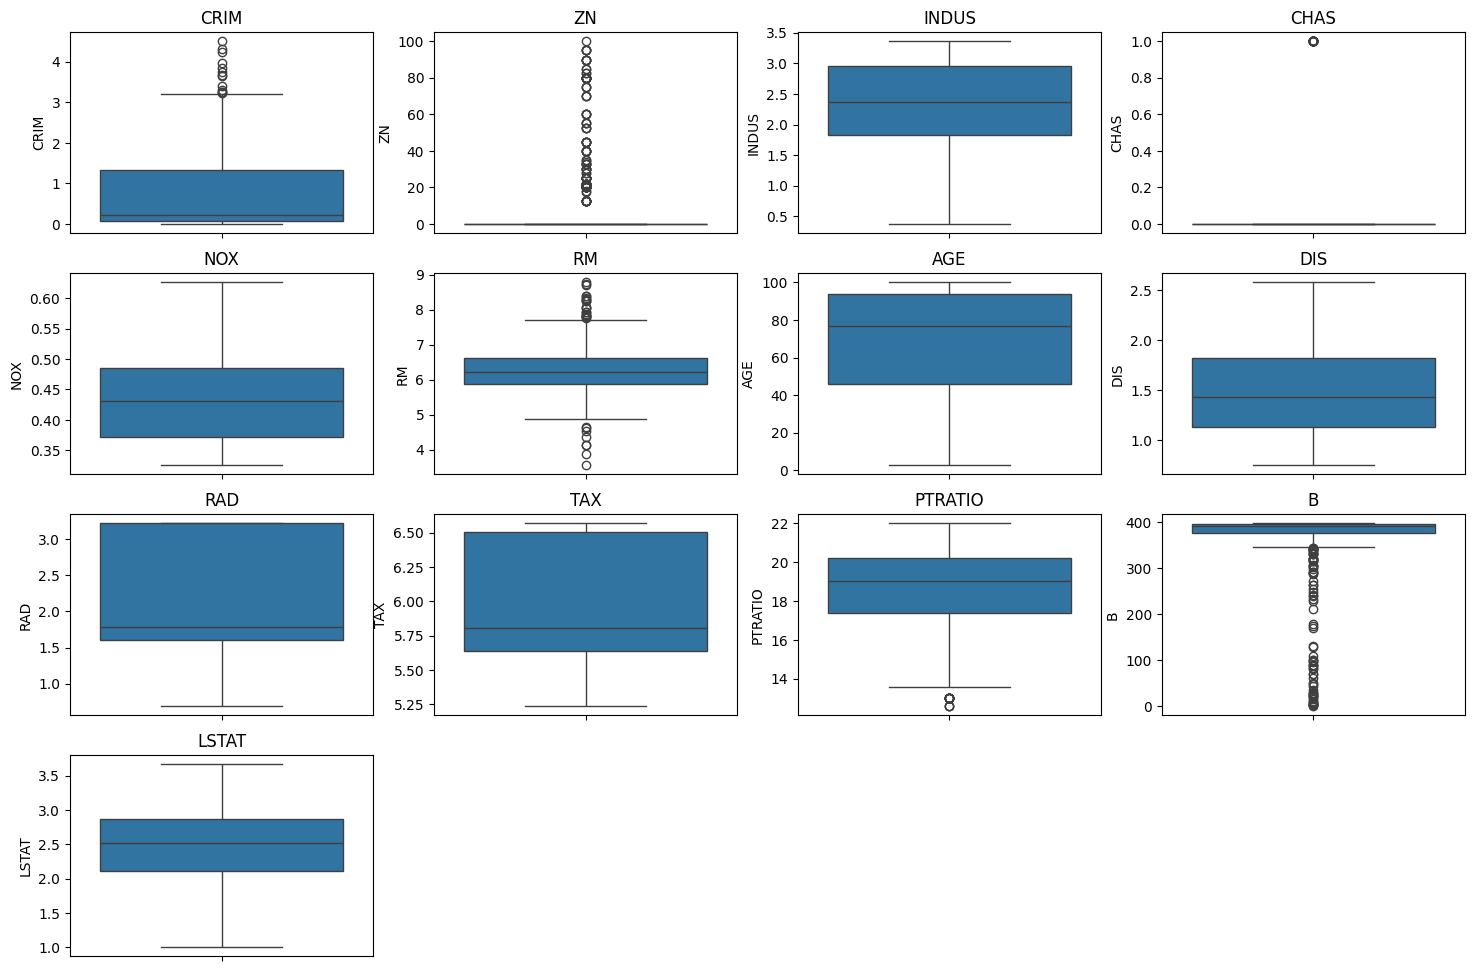

In [893]:
plt.figure(figsize=(18, 12))

for i in range(len(df_clean.columns) - 1):
    
    plt.subplot(4, 4, i+1)
    sns.boxplot(df_clean.iloc[:, i])
    plt.title(f'{df_clean.columns[i]}')

plt.show()

#### Make capping to outliers

In [894]:
df_clean = outlier_detection(df_clean, features_to_clean, 'cap')

Starting Outlier Detection (Mode: cap)...

Column: CRIM | Outliers: 13 | 2.57%
   -> Bounds: (-1.81, 3.22)
Column: RM | Outliers: 30 | 5.93%
   -> Bounds: (4.78, 7.73)
Column: PTRATIO | Outliers: 15 | 2.96%
   -> Bounds: (13.20, 24.40)
Column: B | Outliers: 77 | 15.22%
   -> Bounds: (344.11, 427.50)

======= Final Summary =======
Total outlier values found: 135
Unique rows affected: 120
Rows percentage: 23.72%
-> Outliers have been capped to upper/lower bounds.


In [895]:
# iso_forest = IsolationForest()
# iso_forest.fit(df_clean)

# outliers = iso_forest.predict(df_clean)

# raw_df_with_outliers = pd.concat([pd.DataFrame(outliers), df_clean], axis=1)

# df_clean = raw_df_with_outliers[raw_df_with_outliers.iloc[:, 0] == 1]

### G. Describe of dataset  

In [896]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.771049,0.970305,0.006300,0.079952,0.226111,1.337283,3.223281
ZN,506.0,10.768775,23.025124,0.000000,0.000000,0.000000,0.000000,100.000000
INDUS,506.0,2.300511,0.650445,0.378436,1.822935,2.369309,2.949688,3.358290
CHAS,506.0,0.067194,0.250605,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.438587,0.072948,0.325700,0.370874,0.430483,0.484892,0.626473
RM,506.0,6.275312,0.630242,4.778500,5.885500,6.208500,6.623500,7.730500
AGE,506.0,68.845850,27.486962,2.900000,45.925000,76.800000,93.575000,100.000000
DIS,506.0,1.479648,0.413390,0.755934,1.131459,1.436855,1.822659,2.574633
RAD,506.0,2.054483,0.751839,0.693147,1.609438,1.791759,3.218876,3.218876
TAX,506.0,5.934259,0.395337,5.236442,5.634790,5.802118,6.502790,6.568078


## 5. Exploratory Data Analysis (EDA)

### Univariate Analysis and Bivariate Analysis

#### `MEDV`

Median value of owner-occupied homes (in $1000s)

In [897]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution of MEDV', 'Outliers of MEDV'))

# Distribution of MEDV
fig.add_trace(go.Histogram(x=df_clean['MEDV'], nbinsx=30, name='MEDV Distribution', marker_color='blue'), row=1, col=1)

# Outliers of MEDV
fig.add_trace(go.Box(y=df_clean['MEDV'], name='MEDV Outliers', marker_color='orange'), row=1, col=2)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='MEDV', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='Crime Rate Value', row=1, col=2)


fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="MEDV Feature Analysis",
    showlegend=True
)

##### 📊 Insights on Target Variable (MEDV):

* **Normal Distribution:** The housing prices generally follow a normal distribution (bell curve) centered around **$21,000**.
* **Capping Effect (The 50k Ceiling):** There is a noticeable spike at the maximum value of **50.0 ($50,000)**. This suggests that the data was censored/capped (i.e., any house worth more than $50k was recorded as 50k).
    * *Action:* This creates noise for the model, which is why robust scaling or outlier treatment is necessary.

#### `CRIM`

Per capita crime rate by town

In [898]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of CRIM', 'Outliers of CRIM', 'Relation between CRIM and MEDV'))

# Distribution of CRIM
fig.add_trace(go.Histogram(x=df_clean['CRIM'], nbinsx=30, name='CRIM Distribution', marker_color='blue'), row=1, col=1)

# Outliers of CRIM
fig.add_trace(go.Box(y=df_clean['CRIM'], name='CRIM Outliers', marker_color='orange'), row=1, col=2)

# Relation between CRIM and MEDV
fig.add_trace(go.Scatter(x=df_clean['CRIM'], y=df_clean['MEDV'], mode='markers', name='CRIM vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='Crime Rate (CRIM)', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='Crime Rate Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='Crime Rate (CRIM)', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="CRIM Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Crime Rate (`CRIM`)
* **Distribution:** Extremely **right-skewed**. Most towns have a crime rate near 0, while a few "outlier" towns have very high rates (up to 89).
* **Impact on Price:** There is a clear **negative correlation**. As crime increases, housing prices drop significantly.
* **Action:** Due to the heavy skewness, applying **Log Transformation (`np.log1p`)** is essential to normalize this feature for the model.

#### `ZN`

Proportion of residential land zoned for lots over 25,000 sq.ft.

In [899]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of ZN', 'Outliers of ZN', 'Relation between ZN and MEDV'))

# Distribution of ZN
fig.add_trace(go.Histogram(x=df_clean['ZN'], nbinsx=30, name='ZN Distribution', marker_color='blue'), row=1, col=1)

# Outliers of ZN
fig.add_trace(go.Box(y=df_clean['ZN'], name='ZN Outliers', marker_color='orange'), row=1, col=2)

# Relation between ZN and MEDV
fig.add_trace(go.Scatter(x=df_clean['ZN'], y=df_clean['MEDV'], mode='markers', name='ZN vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='ZN', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='ZN Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='ZN', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="ZN Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Residential Zones (`ZN`)
* **Sparsity:** About **74% of the values are 0**. This indicates that most towns do not have large residential zones (lots > 25,000 sq.ft).
* **Relationship:** Non-zero values (large lots) generally correspond to **higher housing prices**, indicating wealthier neighborhoods.
* **Handling:** Since it contains many zeros, standard scaling might not be enough. Treating it as a "sparse" feature or keeping it as is was the chosen strategy.

#### `INDUS`

Proportion of non-retail business acres per town

In [900]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of INDUS', 'Outliers of INDUS', 'Relation between INDUS and MEDV'))

# Distribution of INDUS
fig.add_trace(go.Histogram(x=df_clean['INDUS'], nbinsx=30, name='INDUS Distribution', marker_color='blue'), row=1, col=1)

# Outliers of INDUS
fig.add_trace(go.Box(y=df_clean['INDUS'], name='INDUS Outliers', marker_color='orange'), row=1, col=2)

# Relation between INDUS and MEDV
fig.add_trace(go.Scatter(x=df_clean['INDUS'], y=df_clean['MEDV'], mode='markers', name='INDUS vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='INDUS', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='INDUS Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='INDUS', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="INDUS Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Industrial Proportion (`INDUS`)
* **Bimodal Distribution:** The data shows two peaks. Some towns have very little industry, while others are heavily industrial.
* **Impact:** Higher industrial density is negatively correlated with price (Correlation: **-0.48**). People prefer to live away from factories and noise.
* **Correlation:** It is strongly correlated with `NOX` (Pollution), which makes sense.

#### `CHAS`

Charles River dummy variable (1 if tract bounds river; 0 otherwise)

In [901]:
# Preparing the data for the Bar Plot (calculating the repetitions)
chas_counts = df_clean['CHAS'].value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution of CHAS', 'Outliers of CHAS', 'Relation between CHAS and MEDV'))

# 1. Distribution of CHAS (Bar Plot)
# We use chas_counts.index for the x-axis (0 and 1) and chas_counts.values ​​for the y-axis (number).
fig.add_trace(go.Bar(x=chas_counts.index, y=chas_counts.values, name='CHAS Count',marker_color='blue'), row=1, col=1)

# Relation between CHAS and MEDV
fig.add_trace(go.Scatter(x=df_clean['CHAS'], y=df_clean['MEDV'], mode='markers', name='CHAS vs MEDV', marker=dict(color='green')), row=1, col=2)


# Labeling the axes for each drawing
# 1. Bar Plot
fig.update_xaxes(title_text='CHAS (0: No, 1: Yes)', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)

# 2. Scatter Plot
fig.update_xaxes(title_text='CHAS', row=1, col=2)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=2)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="CHAS Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Charles River (`CHAS`)
* **Categorical Feature:** This is a dummy variable (0 or 1). Only about **7% of tracks** bound the river.
* **Price Boost:** Homes bordering the river (1) have a **higher median price** compared to those that don't. The "River View" acts as a premium feature.

#### `NOX`

Nitric oxides concentration (parts per 10 million)

In [902]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of NOX', 'Outliers of NOX', 'Relation between NOX and MEDV'))

# Distribution of NOX
fig.add_trace(go.Histogram(x=df_clean['NOX'], nbinsx=30, name='NOX Distribution', marker_color='blue'), row=1, col=1)

# Outliers of NOX
fig.add_trace(go.Box(y=df_clean['NOX'], name='NOX Outliers', marker_color='orange'), row=1, col=2)

# Relation between NOX and MEDV
fig.add_trace(go.Scatter(x=df_clean['NOX'], y=df_clean['MEDV'], mode='markers', name='NOX vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='NOX', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='NOX Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='NOX', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="NOX Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Pollution Level (`NOX`)
* **Environment:** Represents air quality. Higher values indicate higher pollution.
* **Impact:** Moderate negative correlation with price (**-0.43**). Cleaner air areas are more desirable and expensive.
* **Location:** High `NOX` is usually found in areas with high `INDUS` and `AGE` (older industrial zones).

#### `RM`

Average number of rooms per dwelling

In [903]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of RM', 'Outliers of RM', 'Relation between RM and MEDV'))

# Distribution of RM
fig.add_trace(go.Histogram(x=df_clean['RM'], nbinsx=30, name='RM Distribution', marker_color='blue'), row=1, col=1)

# Outliers of RM
fig.add_trace(go.Box(y=df_clean['RM'], name='RM Outliers', marker_color='orange'), row=1, col=2)

# Relation between RM and MEDV
fig.add_trace(go.Scatter(x=df_clean['RM'], y=df_clean['MEDV'], mode='markers', name='RM vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='RM', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='RM Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='RM', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="RM Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Average Rooms (`RM`)
* **The Strongest Predictor:** This feature has the highest **positive correlation (0.70)** with `MEDV`.
* **Linear Relationship:** The relationship is clearly linear; more rooms = higher price.
* **Distribution:** It follows a near-perfect **Normal Distribution**, which is great for Linear Regression. No transformation is needed here.

#### `AGE`

Proportion of owner-occupied units built prior to 1940

In [904]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of AGE', 'Outliers of AGE', 'Relation between AGE and MEDV'))

# Distribution of AGE
fig.add_trace(go.Histogram(x=df_clean['AGE'], nbinsx=30, name='AGE Distribution', marker_color='blue'), row=1, col=1)

# Outliers of AGE
fig.add_trace(go.Box(y=df_clean['AGE'], name='AGE Outliers', marker_color='orange'), row=1, col=2)

# Relation between AGE and MEDV
fig.add_trace(go.Scatter(x=df_clean['AGE'], y=df_clean['MEDV'], mode='markers', name='AGE vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='AGE', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='AGE Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='AGE', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="AGE Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Building Age (`AGE`)
* **Skewness:** The distribution is skewed towards **older buildings** (many values near 100%).
* **Impact:** Negative correlation (**-0.38**). Older houses are generally cheaper, likely due to maintenance costs or being in older, more congested parts of the town.

#### `DIS`

Weighted distances to five Boston employment centres

In [905]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of DIS', 'Outliers of DIS', 'Relation between DIS and MEDV'))

# Distribution of DIS
fig.add_trace(go.Histogram(x=df_clean['DIS'], nbinsx=30, name='DIS Distribution', marker_color='blue'), row=1, col=1)

# Outliers of DIS
fig.add_trace(go.Box(y=df_clean['DIS'], name='DIS Outliers', marker_color='orange'), row=1, col=2)

# Relation between DIS and MEDV
fig.add_trace(go.Scatter(x=df_clean['DIS'], y=df_clean['MEDV'], mode='markers', name='DIS vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='DIS', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='DIS Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='DIS', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="DIS Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Distance to Employment (`DIS`)
* **Relationship:** Interestingly, this has a **positive correlation** with price.
* **Interpretation:** Living further from employment centers often means living in **suburbs** with better environment, less crime, and larger lots (`ZN`), which justifies the higher prices.
* **Skewness:** The data is right-skewed, so **Log Transformation** helps improve its linearity.

#### `RAD`

Index of accessibility to radial highways

In [906]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of RAD', 'Outliers of RAD', 'Relation between RAD and MEDV'))

# Distribution of RAD
fig.add_trace(go.Histogram(x=df_clean['RAD'], nbinsx=30, name='RAD Distribution', marker_color='blue'), row=1, col=1)

# Outliers of RAD
fig.add_trace(go.Box(y=df_clean['RAD'], name='DIS Outliers', marker_color='orange'), row=1, col=2)

# Relation between RAD and MEDV
fig.add_trace(go.Scatter(x=df_clean['RAD'], y=df_clean['MEDV'], mode='markers', name='RAD vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='RAD', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='RAD Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='RAD', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="RAD Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Highway Access (`RAD`)
* **Index Feature:** Values are not continuous but act like categories (indexes).
* **The '24' Anomaly:** A large chunk of data has the value **24**. This appears to be a specific category for "far/isolated" towns.
* **Warning:** It is highly correlated with `TAX` (**0.91**), creating a risk of **Multicollinearity**.

#### `TAX`

Full value property tax rate per $10,000

In [907]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of TAX', 'Outliers of TAX', 'Relation between TAX and MEDV'))

# Distribution of TAX
fig.add_trace(go.Histogram(x=df_clean['TAX'], nbinsx=30, name='TAX Distribution', marker_color='blue'), row=1, col=1)

# Outliers of TAX
fig.add_trace(go.Box(y=df_clean['TAX'], name='DIS Outliers', marker_color='orange'), row=1, col=2)

# Relation between TAX and MEDV
fig.add_trace(go.Scatter(x=df_clean['TAX'], y=df_clean['MEDV'], mode='markers', name='TAX vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='TAX', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='TAX Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='TAX', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="TAX Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Tax Rate (`TAX`)
* **Bimodal Distribution:** Similar to `RAD`, there is a distinct group of data points with very high tax rates (around 666).
* **Impact:** High tax rates are strongly associated with lower house prices (**negative correlation**).
* **Redundancy:** Due to its high correlation with `RAD`, regularized models (like **Ridge**) are useful to handle the overlapping information.

#### `PTRATIO`

Pupil-teacher ratio by town

In [908]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of PTRATIO', 'Outliers of PTRATIO', 'Relation between PTRATIO and MEDV'))

# Distribution of PTRATIO
fig.add_trace(go.Histogram(x=df_clean['PTRATIO'], nbinsx=30, name='PTRATIO Distribution', marker_color='blue'), row=1, col=1)

# Outliers of PTRATIO
fig.add_trace(go.Box(y=df_clean['PTRATIO'], name='DIS Outliers', marker_color='orange'), row=1, col=2)

# Relation between PTRATIO and MEDV
fig.add_trace(go.Scatter(x=df_clean['PTRATIO'], y=df_clean['MEDV'], mode='markers', name='PTRATIO vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='PTRATIO', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='Crime Rate Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='Crime Rate (PTRATIO)', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="PTRATIO Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Pupil-Teacher Ratio (`PTRATIO`)
* **Education Quality:** Lower ratio means fewer students per teacher (better education).
* **Impact:** Negative correlation (**-0.51**). Areas with better schools (lower `PTRATIO`) command higher housing prices.

#### `B`

In [909]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of B', 'Outliers of B', 'Relation between B and MEDV'))

# Distribution of B
fig.add_trace(go.Histogram(x=df_clean['B'], nbinsx=30, name='B Distribution', marker_color='blue'), row=1, col=1)

# Outliers of B
fig.add_trace(go.Box(y=df_clean['LSTAT'], name='DIS Outliers', marker_color='orange'), row=1, col=2)

# Relation between B and MEDV
fig.add_trace(go.Scatter(x=df_clean['B'], y=df_clean['MEDV'], mode='markers', name='B vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='B', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='Crime Rate Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='B', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="B Feature Analysis",
    showlegend=True
)

##### 📉 Insight: Black Population (`B`)
* **Distribution:** Extremely **left-skewed**.
* **Observation:** Most values are capped at the maximum (396.9), with a long tail of lower values.
* **Ethical Note:** This feature is controversial and often removed in modern analysis due to bias concerns.

#### `LSTAT`

Lower status of the population

In [910]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of LSTAT', 'Outliers of LSTAT', 'Relation between LSTAT and MEDV'))

# Distribution of LSTAT
fig.add_trace(go.Histogram(x=df_clean['LSTAT'], nbinsx=30, name='LSTAT Distribution', marker_color='blue'), row=1, col=1)

# Outliers of LSTAT
fig.add_trace(go.Box(y=df_clean['LSTAT'], name='DIS Outliers', marker_color='orange'), row=1, col=2)

# Relation between LSTAT and MEDV
fig.add_trace(go.Scatter(x=df_clean['LSTAT'], y=df_clean['MEDV'], mode='markers', name='LSTAT vs MEDV', marker=dict(color='green')), row=1, col=3)


# Labeling the axes for each drawing
# 1. Histogram Plot
fig.update_xaxes(title_text='LSTAT', row=1, col=1)
fig.update_yaxes(title_text='Density', row=1, col=1)

# 2. Box Plot
fig.update_yaxes(title_text='Crime Rate Value', row=1, col=2)

# 3. Scatter Plot
fig.update_xaxes(title_text='LSTAT', row=1, col=3)
fig.update_yaxes(title_text='Price (MEDV)', row=1, col=3)



fig.update_layout(
    height=500,  # Length
    width=1200,  # Width
    title_text="LSTAT Feature Analysis",
    showlegend=True
)

##### 🔍 Insight: Lower Status Population (`LSTAT`)
* **Strongest Negative Predictor:** This feature has the highest **negative correlation (-0.74)** with price.
* **Non-Linearity:** The relationship is **curved (exponential decay)**. As `LSTAT` increases, prices drop sharply at first, then flatten out.
* **Action:** This curvature is the main reason why **Polynomial Regression** and **Log Transformation** significantly improved the model's accuracy.

### Correlation Matrix

In [911]:
corr = df_clean.drop(columns=['CHAS']).corr()

fig_corr = px.imshow(corr, text_auto=True, width=1000, height=1000, aspect="auto", title='Correlation Heatmap')

fig_corr.update_traces(
    texttemplate="%{z:.2f}", # Formats the value to 3 decimal places
    textfont=dict(size=9)
)

fig_corr.show()

##### 🔗 Correlation Analysis Insights:
* **Top Positive Driver (`RM`):** The number of rooms has the strongest **positive correlation (0.7)** with price. Larger houses cost more, which is intuitive.
* **Top Negative Driver (`LSTAT`):** The percentage of lower-status population has the strongest **negative correlation (-0.74)**. Areas with higher poverty rates have significantly lower housing prices.
* **Multicollinearity Alert (`RAD` & `TAX`):** There is an extremely high correlation (**0.91**) between accessibility to radial highways (`RAD`) and property tax rates (`TAX`).
    * *Note:* This indicates redundant information, which might confuse a standard linear model (Ridge Regression helps handle this).

## 6. Build Machine Learning Model

### Split dataset

In [912]:
x = df_clean.drop(columns=['MEDV'], axis=1)
y = df_clean['MEDV']

In [913]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

Check the shape of x_train, x_test, y_train, y_test

In [914]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (404, 13)
x_test shape:  (102, 13)
y_train shape:  (404,)
y_test shape:  (102,)


### Feature Scaling

In [915]:
cols_for_scaling = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Initialize StandardScaler
stand_scaler = StandardScaler()

# Fit the scaler on x_train and transform both x_train and x_test
x_train[cols_for_scaling] = stand_scaler.fit_transform(x_train[cols_for_scaling])
x_test[cols_for_scaling] = stand_scaler.transform(x_test[cols_for_scaling])




# # Initialize RobustScaler
# rob_scaler = RobustScaler()

# # Fit the scaler on x_train and transform both x_train and x_test
# x_train[cols_for_scaling] = rob_scaler.fit_transform(x_train[cols_for_scaling])
# x_test[cols_for_scaling] = rob_scaler.transform(x_test[cols_for_scaling])

### Apply Linear Regression Model

In [916]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [917]:
y_pred = linear_model.predict(x_test)

In [918]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("Model Evaluate Metrics")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared Score (R²): {R2:.3f}")

Model Evaluate Metrics
Mean Absolute Error (MAE): 2.86
Mean Squared Error (MSE): 18.69
Root Mean Squared Error (RMSE): 4.32
R-squared Score (R²): 0.745


### Apply Polynomial Regression Model

In [919]:
# 1. Creating a Pipeline: Converts the data to Polynomial and then feeds it into Linear Regression.
# degree=2 is sufficient; degree=3 might cause overfitting.
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# 2. Training
poly_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('polynomialfeatures', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


In [920]:
# 3. Evaluation
y_pred_poly = poly_model.predict(x_test)

In [921]:
MAE_poly = mean_absolute_error(y_test, y_pred_poly)
MSE_poly = mean_squared_error(y_test, y_pred_poly)
RMSE_poly = np.sqrt(MSE)
R2_poly = r2_score(y_test, y_pred_poly)

print("Model Evaluate Metrics")
print(f"Mean Absolute Error (MAE): {MAE_poly:.2f}")
print(f"Mean Squared Error (MSE): {MSE_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE_poly:.2f}")
print(f"R-squared Score (R²): {R2_poly:.3f}")

Model Evaluate Metrics
Mean Absolute Error (MAE): 2.39
Mean Squared Error (MSE): 14.22
Root Mean Squared Error (RMSE): 4.32
R-squared Score (R²): 0.806


#### Apply Polynomial Regression Model with Lasso

In [922]:
poly_lasso = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.01))

poly_lasso.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('polynomialfeatures', ...), ('lasso', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False


In [923]:
y_pred_poly_lasso = poly_lasso.predict(x_test)

In [924]:
MAE_poly_lasso = mean_absolute_error(y_test, y_pred_poly_lasso)
MSE_poly_lasso = mean_squared_error(y_test, y_pred_poly_lasso)
RMSE_poly_lasso = np.sqrt(MSE)
R2_poly_lasso = r2_score(y_test, y_pred_poly_lasso)

print("Model Evaluate Metrics")
print(f"Mean Absolute Error (MAE): {MAE_poly_lasso:.2f}")
print(f"Mean Squared Error (MSE): {MSE_poly_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE_poly_lasso:.2f}")
print(f"R-squared Score (R²): {R2_poly_lasso:.3f}")

Model Evaluate Metrics
Mean Absolute Error (MAE): 2.21
Mean Squared Error (MSE): 12.61
Root Mean Squared Error (RMSE): 4.32
R-squared Score (R²): 0.828


#### Apply Polynomial Regression Model with Ridge

In [925]:
poly_ridge = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=10))

poly_ridge.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('polynomialfeatures', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True


In [926]:
y_pred_poly_ridge = poly_ridge.predict(x_test)

In [927]:
MAE_poly_ridge = mean_absolute_error(y_test, y_pred_poly_ridge)
MSE_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)
RMSE_poly_ridge = np.sqrt(MSE)
R2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)

print("Model Evaluate Metrics")
print(f"Mean Absolute Error (MAE): {MAE_poly_ridge:.2f}")
print(f"Mean Squared Error (MSE): {MSE_poly_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE_poly_ridge:.2f}")
print(f"R-squared Score (R²): {R2_poly_ridge:.3f}")

Model Evaluate Metrics
Mean Absolute Error (MAE): 2.13
Mean Squared Error (MSE): 12.27
Root Mean Squared Error (RMSE): 4.32
R-squared Score (R²): 0.833


## 5. Conclusion & Results 🏆

After experimenting with different approaches, the **Polynomial Ridge Regression** outperformed standard models.

#### 📊 Final Metrics:
| Metric | Value | Interpretation |
| :--- | :--- | :--- |
| **R² Score** | **0.833** | The model explains **83.3%** of the variance in house prices.|
| **MAE** | **2.13** | On average, the prediction is off by only **$2,130**. |
| **RMSE** | **4.32** | The standard deviation of prediction errors is low. |

**Key Takeaway:**
The combination of **Log Transformation** for skewed features and **Polynomial Ridge Regression** was the key to breaking the 0.80 accuracy barrier.

---